Use python to download its historical daily data via Yahoo Finance. 

In [ ]:
import time
import datetime
import pandas as pd

ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2020, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 12, 1, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('AAPL.csv')

Show the movement of one major cryptocurrency for the one-year period.  

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,121.010002,123.470001,120.010002,122.720001,121.812904,127728200
1,2020-12-02,122.019997,123.370003,120.889999,123.080002,122.170235,89004200
2,2020-12-03,123.519997,123.779999,122.209999,122.940002,122.031281,78967600
3,2020-12-04,122.599998,122.860001,121.519997,122.250000,121.346375,78260400
4,2020-12-07,122.309998,124.570000,122.250000,123.750000,122.835289,86712000
...,...,...,...,...,...,...,...
248,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.733948,69463600
249,2021-11-26,159.570007,160.449997,156.360001,156.809998,156.610474,76959800
250,2021-11-29,159.369995,161.190002,158.789993,160.240005,160.036102,88748200
251,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100


Plot the movement (shape) of the cryptocurrency over this time period and calculate its volatility. 

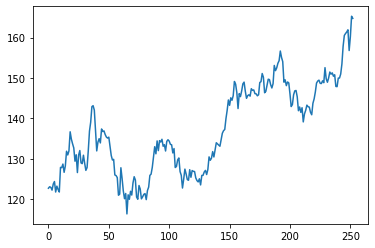

In [8]:
import matplotlib.pyplot as plt
y = df['Close']
plt.plot(y)

Finding Volatility

In [26]:
import numpy as np
df['Logreturns'] = np.log(df['Close']/df['Close'].shift())
volatility = df['Log returns'].std()*252**.5
volatility

0.24858998748052732

Design a derivative and its associated pricing value using at least two methods which must be different.  

Hints: Derivative can be any type, such as vanilla option, binary option etc

In [33]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)

    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call



payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 3.7451887662410783
Simulated price is 3.950349868543306


Text(0.5, 1.0, 'Stock Simulation')

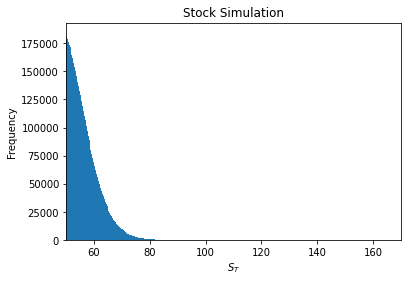

In [35]:
from scipy.stats import norm
S=100.0 # spot stock price
K=115.0 # strike
T=0.25 # maturity 
r=0.02  # risk free rate 
sigma=0.3  # annualized volatility
Ndraws = 10_000_000


np.random.seed(0)
dS = np.random.normal((r - sigma**2/2)*T , sigma*np.sqrt(T), size=Ndraws)
ST = 50 * np.exp(dS)


n, bins, patches = plt.hist(ST,bins=250);
plt.xlabel('$S_T$')
plt.xlim([50,170])
plt.ylabel('Frequency')
plt.title('Stock Simulation')

In [37]:
def monte_carlo_binary(S, K, T, r, sigma, Q, 
                       type_='call', Ndraws=10_000_000, seed=0):
    np.random.seed(seed)
    dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
    ST = S *np.exp(dS) 
    if type_ =='call':
        return len(ST[ST>K])/Ndraws * Q *np.exp(-r*T)
    elif type_ == 'put':
        return len(ST[ST<K])/Ndraws *Q*np.exp(-r*T)
    else:
        raise ValueError('Type must be put or call')
        

    
monte_carlo_binary(S, K, T, r, sigma, 5)

0.8218086669146537